# Diabetes Health Indicator

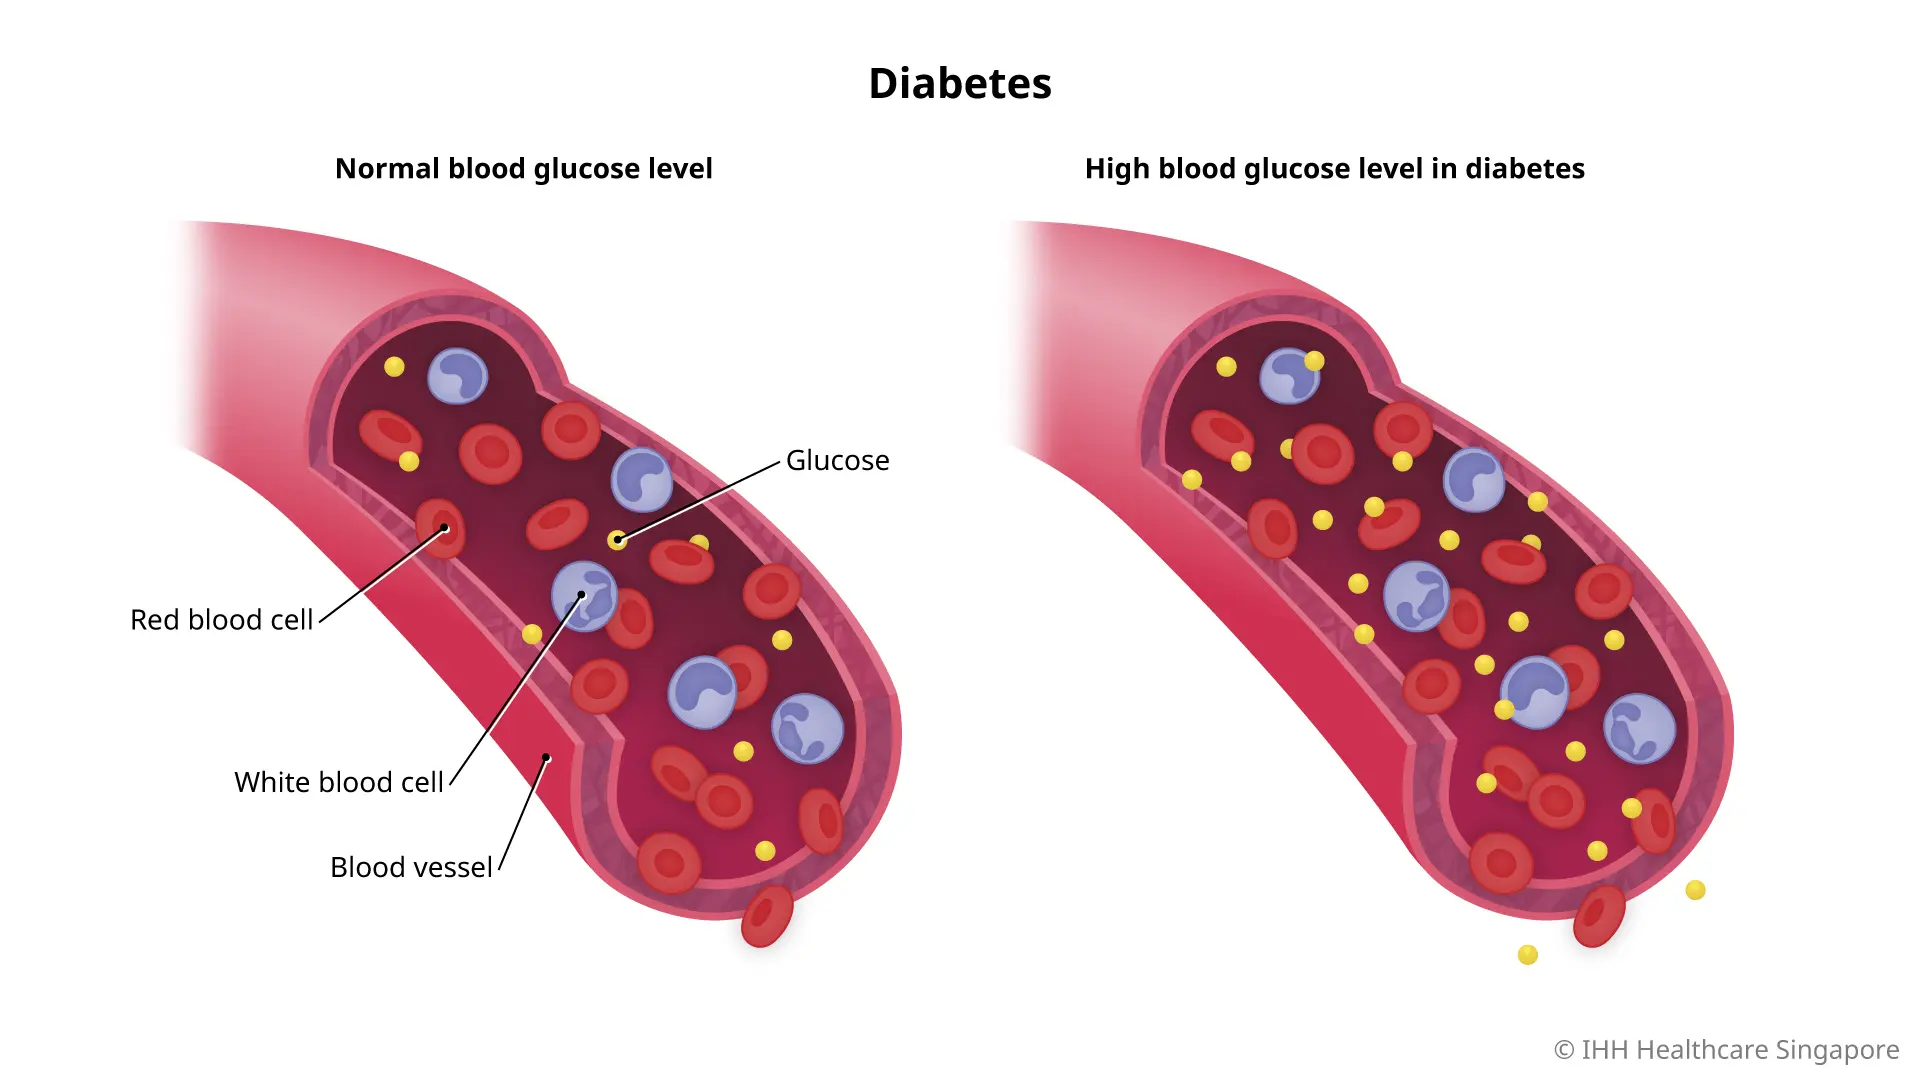

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Glucose is your body’s main source of energy. Your body can make glucose, but glucose also comes from the food you eat.

Insulin is a hormone made by the pancreas that helps glucose get into your cells to be used for energy. If you have diabetes, your body doesn’t make enough—or any—insulin, or doesn’t use insulin properly. Glucose then stays in your blood and doesn’t reach your cells.

Diabetes raises the risk for damage to the eyes, kidneys, nerves, and heart. Diabetes is also linked to some types of cancer. Taking steps to prevent or manage diabetes may lower your risk of developing diabetes health problems.

A Diabetes Health Indicator Prediction project using machine learning involves analyzing health-related data to predict the likelihood of diabetes in individuals. 

The goal is to develop a machine learning model that predicts whether an individual has diabetes based on health indicators such as BMI, glucose levels, physical activity, and other factors.

# Dataset Overview

1. Diabetes : Indicates whether a person has diabetes
2. HighBP (High Blood Pressure) :  Indicates whether a person has been diagnosed with hypertension. High blood pressure is a common comorbidity with diabetes.
3. HighChol (High Cholesterol) : Indicates whether a person has high cholesterol. High cholesterol is associated with metabolic syndrome, a risk factor for diabetes.
4. CholCheck (Cholesterol Check in the Last 5 Years) : Indicates whether a person has checked their cholesterol levels in the past 5 years.  Regular cholesterol checks may reflect health awareness.
5. BMI (Body Mass Index) : A measure of body fat based on height and weight. Obesity is a major risk factor for diabetes.
6. Smoker (Smoking History) : Indicates if a person has smoked at least 100 cigarettes in their lifetime. Smoking increases insulin resistance, leading to a higher risk of diabetes.
7. Stroke (History of Stroke) : Indicates whether a person has had a stroke. Stroke is often linked to vascular complications associated with diabetes.
8. HeartDiseaseorAttack (Heart Disease or Heart Attack History) : Indicates whether a person has been diagnosed with heart disease or had a heart attack.  Diabetes increases the risk of cardiovascular diseases.
9. PhysActivity (Physical Activity in the Last 30 Days) : Indicates whether a person has engaged in any physical activity in the past month. Physical activity reduces diabetes risk by improving insulin sensitivity.
10. Fruits (Daily Fruit Consumption) : Indicates whether a person eats fruit at least once per day.  A healthy diet helps regulate blood sugar levels.
11. Veggies (Daily Vegetable Consumption) : Indicates whether a person eats vegetables at least once per day. Vegetables provide essential nutrients that help maintain insulin function.
12. HvyAlcoholConsump (Heavy Alcohol Consumption) : Indicates whether a person is a heavy drinker. Excessive alcohol consumption can lead to liver damage and insulin resistance.
13. AnyHealthcare (Access to Healthcare) : Indicates whether a person has access to healthcare services. Access to healthcare increases the likelihood of early diabetes detection and treatment.
14. NoDocbcCost (Did Not See a Doctor Due to Cost) : Indicates whether a person avoided seeing a doctor in the past year due to financial concerns. Financial barriers may delay diabetes diagnosis and treatment.
15. GenHlth (General Health Self-Assessment) : Self-reported general health status. Lower health ratings correlate with chronic conditions, including diabetes.
16. MentHlth (Poor Mental Health Days in the Past 30 Days) : Number of days in the past month the person experienced poor mental health. Stress and depression can increase diabetes risk by elevating cortisol levels.
17. PhysHlth (Poor Physical Health Days in the Past 30 Days) : Number of days in the past month the person experienced poor physical health. Chronic health problems affect physical activity and metabolic health.
18. DiffWalk (Difficulty Walking or Climbing Stairs) : Indicates whether the person has difficulty walking. Difficulty walking is often linked to obesity, cardiovascular disease, and diabetes complications.
19. Sex (Gender) : Men and women may have different diabetes risk factors.
20. Age (Age Group) : Age is grouped into categories. Diabetes risk increases with age.
21. Education (Level of Education) : Higher education levels correlate with better health awareness.
22. Income (Household Income) : Higher income correlates with better healthcare access and diet.

# Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from scipy.stats import chi2_contingency

import joblib as jb
import pickle as pk1

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\data science\Dataset\DATASET BY PAVAN SIR\CDC Diabetes health indicator\diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

* All columns in the dataset is numerical columns

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


> Findings
1. Target Variable (Diabetes Status)
    * Mean: 0.297 → Around 29.7% of individuals have prediabetes or diabetes.
    * Std Dev: 0.698 → Large variation in diabetes status.
    * Min: 0 (No Diabetes), Max: 2 (Diagnosed Diabetes).
    * Median (50%): 0 → Most people do not have diabetes.
    * Distribution: Majority without diabetes (0), but some with prediabetes (1) and diagnosed diabetes (2).
2. Health-Related Features
    *  HighBP (High Blood Pressure)
        * Mean: 0.429 → About 43% of individuals have high blood pressure.
        * Std Dev: 0.495 → Close to 50%, meaning almost a balanced distribution.
    * HighChol (High Cholesterol)
        * Mean: 0.424 → About 42.4% have high cholesterol.
        * Std Dev: 0.494 → Similar to HighBP, almost balanced distribution.
    * CholCheck (Cholesterol Check in Last 5 Years)
        * Mean: 0.963 → 96.3% have checked their cholesterol in the past 5 years.
        * Distribution: Almost everyone has undergone a cholesterol check.
    * BMI (Body Mass Index)
        * Mean: 28.38 → Average BMI is in the overweight range (25-30).
        * Std Dev: 6.61 → Variation exists; some people are obese.
        * Min: 12 (underweight), Max: 98 (severely obese).
        * 75% percentile: 31 → At least 25% of people are obese (BMI ≥ 30).
    * Smoker (Smoking History)
        * Mean: 0.443 → 44.3% of people have smoked.
        * Distribution: Nearly half of the dataset consists of smokers.
    * Stroke (History of Stroke)
        * Mean: 0.041 → Only 4.1% have had a stroke.
        * Distribution: Majority (96%) have not had a stroke.
    * HeartDiseaseorAttack (Heart Disease or Attack History)
        * Mean: 0.094 → 9.4% of individuals have heart disease.
        * Std Dev: 0.292 → Large difference between groups (most have 0, a few have 1).
    * PhysActivity (Physical Activity in the Last 30 Days)
        * Mean: 0.757 → 75.7% of people engage in physical activity.
        * Distribution: Most people are physically active.
    * Fruits (Daily Fruit Consumption)
        * Mean: 0.634 → 63.4% of people eat fruits daily.
        * Std Dev: 0.482 → More people consume fruits regularly.
    * Veggies (Daily Vegetable Consumption)
        * Mean: 0.810 → 81% eat vegetables daily.
        * Significance: Healthier eating habits may reduce diabetes risk.
    * HvyAlcoholConsump (Heavy Alcohol Consumption)
        * Mean: 0.051 → Only 5.1% are heavy drinkers.
        * Distribution: Very few people fall into the heavy drinker category.
    * AnyHealthcare (Access to Healthcare)
        * Mean: 0.951 → 95.1% of individuals have healthcare access.
        * Significance: Most people have access to medical facilities.
    * NoDocbcCost (Did Not See a Doctor Due to Cost)
        * Mean: 0.084 → 8.4% skipped a doctor's visit due to cost.
        * Distribution: Most people can afford healthcare.
    * GenHlth (Self-Reported General Health)
        * Mean: 2.51 (Scale: 1 = Excellent, 5 = Poor).
        * 50% percentile (Median): 2 → Most people rate their health as Good.
    * MentHlth (Poor Mental Health Days in the Last 30 Days)
        * Mean: 3.18 days → People experience mental health struggles about 3 days per month.
        * Max: 30 days → Some people report poor mental health every day.
    * PhysHlth (Poor Physical Health Days in the Last 30 Days)
        * Mean: 4.24 days → On average, people feel unwell 4 days per month.
        * Max: 30 → Some individuals are unwell daily.
    * DiffWalk (Difficulty Walking or Climbing Stairs)
        * Mean: 0.168 → 16.8% of individuals have difficulty walking.
        * Distribution: Most people have no mobility issues.
3. Demographic Features
    * Sex (Gender)
        * Mean: 0.44 → More females (0) than males (1).
        * Distribution: About 44% males, 56% females.
    * Age (Age Group)
        * Mean: 8.03 → The average falls around the 55-59 age group.
        * Max: 13 (80+ years).
        * Distribution: Most people are middle-aged or older.
    * Education (Education Level)
        * Mean: 5.05 → Most people have some college education.
        * Max: 6 (College graduate).
    * Income (Household Income)
        * Mean: 6.05 → Most people earn between 50,000 - 75,000.
        * Max: 8 (>$75,000).
        * Significance: Higher income correlates with better healthcare access.

# Checking Null Values

In [6]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

* There is no null values in the dataset

In [7]:
# Checking duplicate values
df.duplicated().sum()

np.int64(23899)

In [8]:
# Dropping duplicate vaules
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


# High Blood Pressure Vs Diabetes

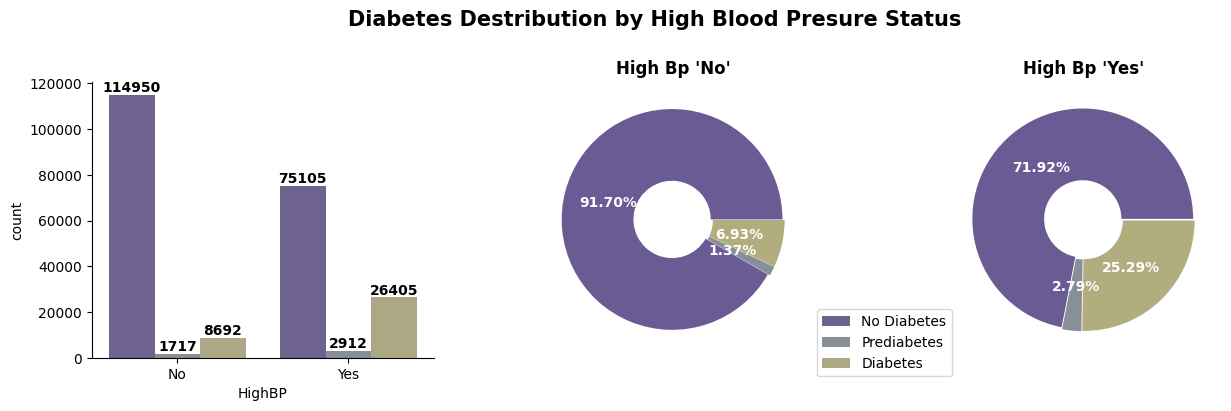

In [11]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by High Blood Presure Status", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="HighBP", hue="Diabetes_012", palette=["#6b5b95","#878f99","#b2ad7f"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["HighBP"],df["Diabetes_012"])[0], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#6b5b95","#878f99","#b2ad7f"], textprops={"color":"white", "weight":"bold"})
plt.title("High Bp 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["HighBP"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#6b5b95","#878f99","#b2ad7f"], textprops={"color":"white", "weight":"bold"})
plt.title("High Bp 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Only 6.93% of people without HighBP have Diabetes, meaning low blood pressure may be protective against diabetes.
* People with HighBP are 3.7x more likely to have Diabetes (25.29%) compared to those without HighBP (6.93%).
* Pre-diabetes (2.79%) is also slightly more common in HighBP individuals than in non-HighBP (1.37%), indicating a progression risk.
* HighBP is a strong risk factor for Diabetes: People with HighBP have a much higher likelihood (25.3%) of being diabetic compared to those without HighBP (6.9%).
* Pre-diabetes is twice as common in HighBP individuals (2.8%) than in those without HighBP (1.4%), showing an early warning sign.
* Most non-diabetics (91.7%) do not have HighBP, reinforcing that controlling blood pressure may help in preventing diabetes.

# High Cholesterol Vs Diabetes

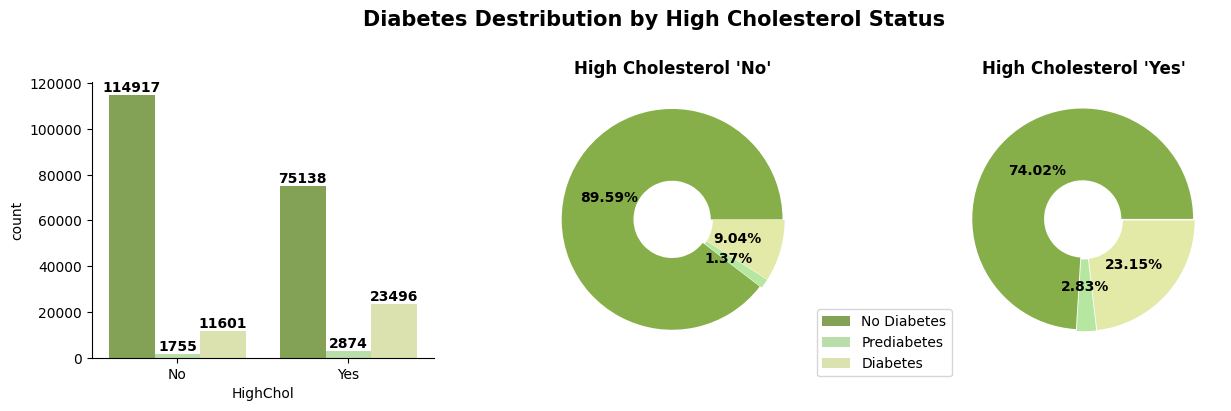

In [12]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by High Cholesterol Status", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="HighChol", hue="Diabetes_012", palette=["#86af49","#b5e7a0","#e3eaa7"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["HighChol"],df["Diabetes_012"])[0], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#86af49","#b5e7a0","#e3eaa7"], textprops={"color":"black", "weight":"bold"})
plt.title("High Cholesterol 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["HighChol"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#86af49","#b5e7a0","#e3eaa7"], textprops={"color":"black", "weight":"bold"})
plt.title("High Cholesterol 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Only 9.04% of people without HighChol have Diabetes, which is relatively low.
* People with HighChol are 2.5x more likely to have Diabetes (23.15%) compared to those without HighChol (9.04%).
* Pre-diabetes is also twice as common (2.83%) in HighChol individuals compared to non-HighChol (1.37%).
* High Cholesterol is a significant risk factor for Diabetes: People with HighChol have a much higher chance (23.15%) of being diabetic compared to those without HighChol (9.04%).
* Pre-diabetes is twice as common in HighChol individuals (2.83%) vs. non-HighChol (1.37%), suggesting early risk detection.
* Most non-diabetics (89.59%) do not have HighChol, reinforcing the importance of cholesterol management in diabetes prevention.

# Cholesterol Check in the past 5 years Vs Diabetes

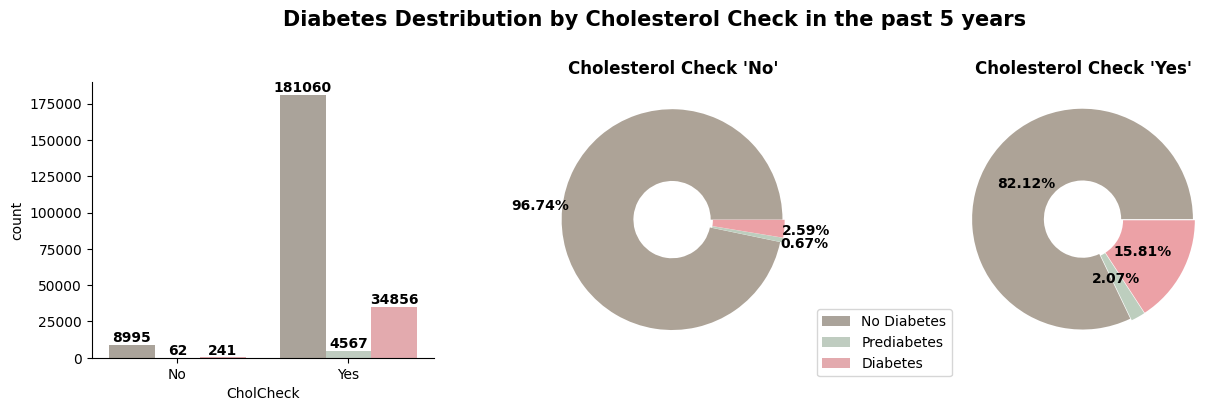

In [13]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Cholesterol Check in the past 5 years", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="CholCheck", hue="Diabetes_012", palette=["#ada397","#bdcebe","#eca1a6"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["CholCheck"],df["Diabetes_012"])[0], autopct="%.2f%%", pctdistance=1.2,
        wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#ada397","#bdcebe","#eca1a6"], textprops={"color":"black", "weight":"bold"})
plt.title("Cholesterol Check 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["CholCheck"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#ada397","#bdcebe","#eca1a6"], textprops={"color":"black", "weight":"bold"})
plt.title("Cholesterol Check 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Diabetes rate is very low (2.59%) among people who never checked their cholesterol.
* However, this group is small (only 4% of the total population), which may indicate a lack of health awareness.
* Diabetes prevalence is much higher (15.81%) among people who checked their cholesterol compared to those who never checked (2.59%).
* More cases of pre-diabetes (2.07%) are also found in this group.
* People who check their cholesterol are much more likely to have diabetes (15.81%) compared to those who never check (2.59%).
* This might indicate that people with existing health concerns are more likely to get checked, leading to higher diabetes diagnosis rates.

# BMI Vs Diabetes

<Figure size 1800x400 with 0 Axes>

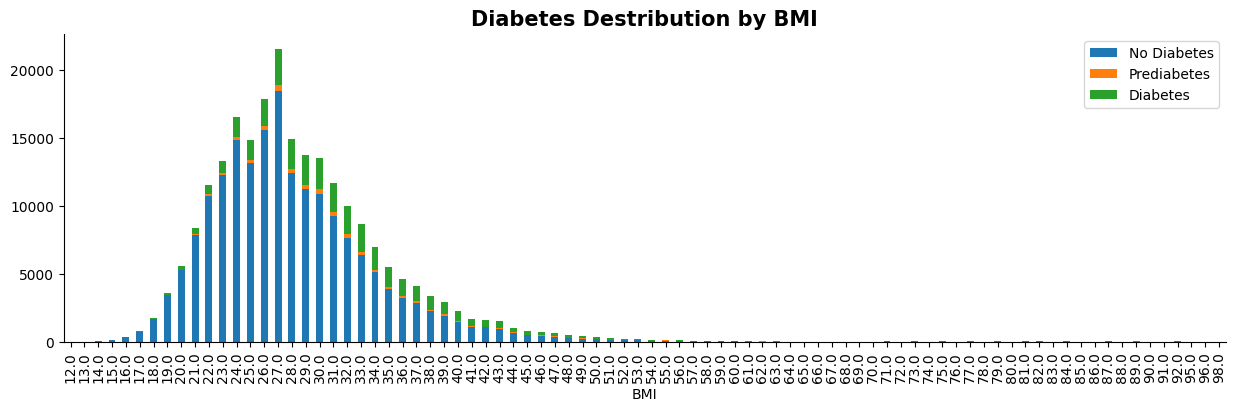

In [14]:
plt.figure(figsize=(18,4))
pd.crosstab(df["BMI"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by BMI", fontsize=15, fontweight="bold")
plt.show()

> Findings
* There is a clear trend that as BMI increases, the number of individuals with diabetes tends to rise, especially after BMI values of 25.
* BMI 30-40: A noticeable increase in diabetes risk appears.
* BMI 40+: Extreme obesity (BMI 40+) correlates with the highest diabetes prevalence, even though the total number of people drops as BMI increases.
* Pre-diabetes/At Risk: Individuals with pre-diabetes seem more prevalent in the BMI 20-30 range, and they start decreasing as BMI values rise further.

In [15]:
# Creating BMI Ranges
df["BMI_Range"] = pd.cut(df["BMI"], bins=[12,18.4,24.9,29.9,39.9,59.9,98], retbins=True,
                        labels=["Underweight (Low Risk)","Normal (Lowest Risk)","Overweight (Moderate Risk)",
                               "Obese (High Risk)","Severely Obese (Very High Risk)","Extremely Obese (Critical Risk)"])[0]

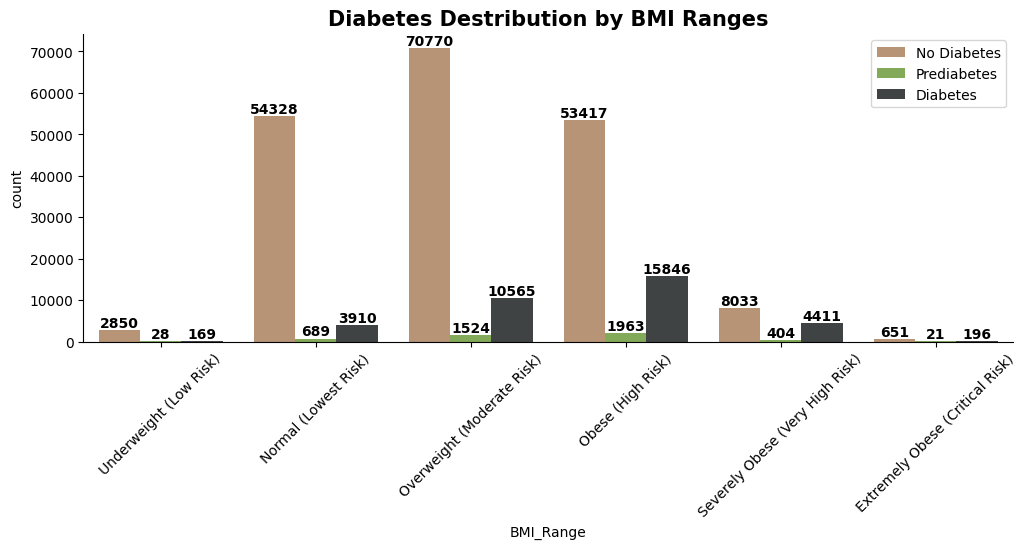

In [16]:
plt.figure(figsize=(12,4))
plt.title("Diabetes Destribution by BMI Ranges", fontsize=15, fontweight="bold")
ax = sns.countplot(df, x="BMI_Range", hue="Diabetes_012", palette=["#c1946a","#82b74b","#3e4444"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

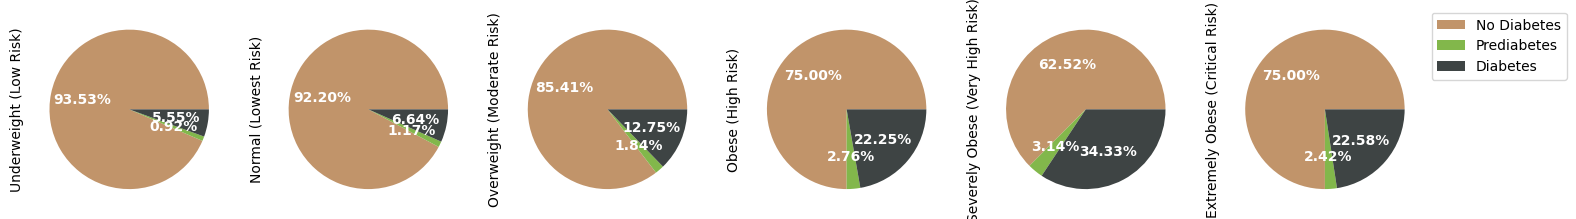

In [17]:
plt.figure(figsize=(15,8))
pd.crosstab(df["BMI_Range"],df["Diabetes_012"]).T.plot.pie(subplots=True, legend=False, figsize=(18,8), autopct="%.2f%%",
                                                          colors=["#c1946a","#82b74b","#3e4444"], textprops={"color":"white", "weight":"bold"})
plt.legend(bbox_to_anchor=(1,1.02),labels=["No Diabetes","Prediabetes","Diabetes"])
plt.show()

> Findings
* In Underweight & Normal BMI groups, 92%+ of people do not have diabetes.
* In Severely Obese, 34.33% of people have diabetes (highest proportion).
* Diabetes prevalence jumps significantly after BMI 30 (Obese and above).
* Highest pre-diabetes cases (3.14%) are in Severely Obese BMI.

# Smoker Vs Diabetes

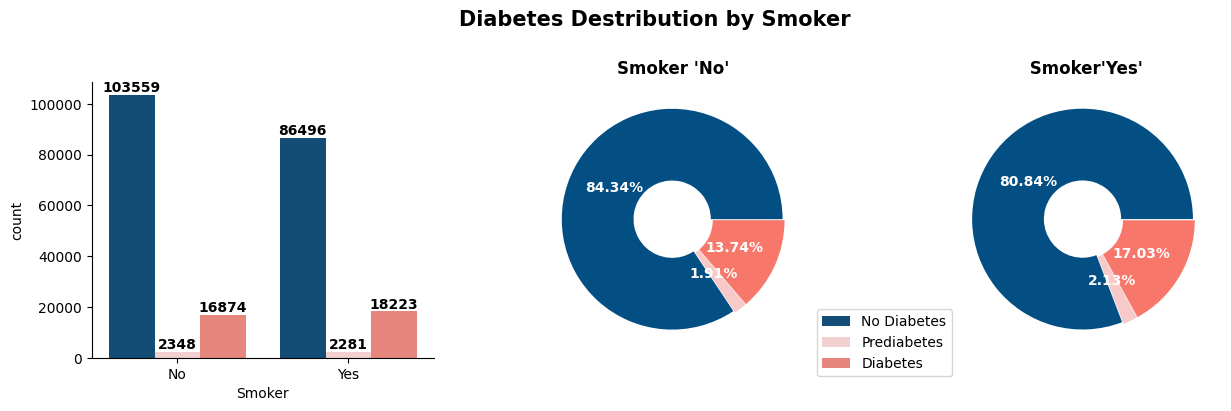

In [18]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Smoker", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="Smoker", hue="Diabetes_012", palette=["#034f84","#f7cac9","#f7786b"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["Smoker"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#034f84","#f7cac9","#f7786b"], textprops={"color":"white", "weight":"bold"})
plt.title("Smoker 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["Smoker"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#034f84","#f7cac9","#f7786b"], textprops={"color":"white", "weight":"bold"})
plt.title(" Smoker'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Higher Diabetes Rate Among Smokers:
    * 17.03% of smokers have diabetes, compared to 13.71% of non-smokers.
    * Smoking appears to correlate with an increased likelihood of diabetes.
* Slightly Higher Pre-Diabetes in Smokers:
    * 2.13% of smokers have pre-diabetes vs. 1.91% of non-smokers.
* More Non-Diabetics in Non-Smokers:
    * 84.34% of non-smokers do not have diabetes, while only 81.84% of smokers are non-diabetic.

# History of Stroke Vs Diabetes

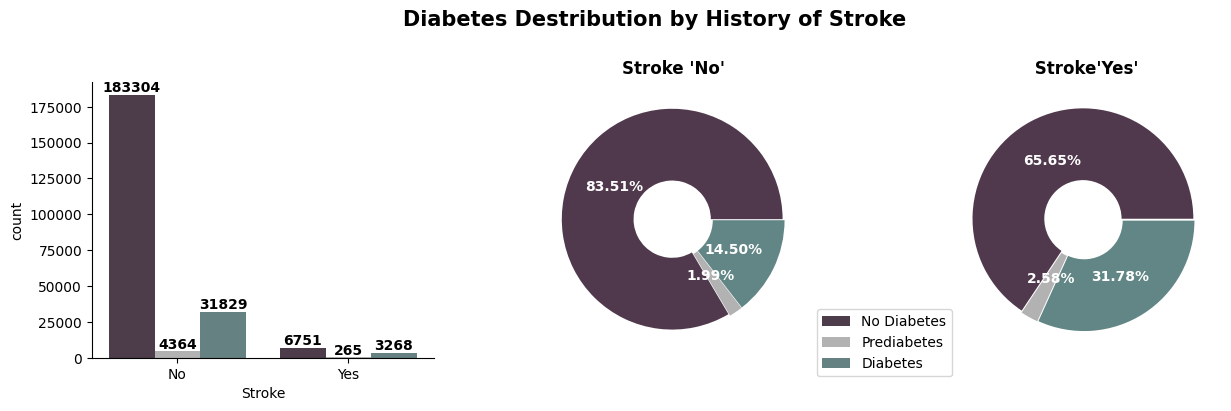

In [19]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by History of Stroke", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="Stroke", hue="Diabetes_012", palette=["#50394c","#b2b2b2","#618685"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["Stroke"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#50394c","#b2b2b2","#618685"], textprops={"color":"white", "weight":"bold"})
plt.title("Stroke 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["Stroke"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#50394c","#b2b2b2","#618685"], textprops={"color":"white", "weight":"bold"})
plt.title(" Stroke'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Higher Diabetes Rate Among Stroke Patients:
    * 31.78% of stroke patients have diabetes, compared to 14.50% of those without a stroke.
    * This suggests a strong link between diabetes and stroke risk.
* Lower Percentage of Non-Diabetics in Stroke Patients:
    * Only 65.65% of stroke patients are non-diabetic, compared to 83.51% among those without a stroke.
* Pre-Diabetes is Slightly Higher in Stroke Patients:
    * 2.58% of stroke patients have pre-diabetes, compared to 1.99% in non-stroke individuals.
* Individuals with diabetes are more likely to have experienced a stroke.
* Preventing or managing diabetes could potentially reduce stroke risk.

# Heart Attack Vs Diabetes

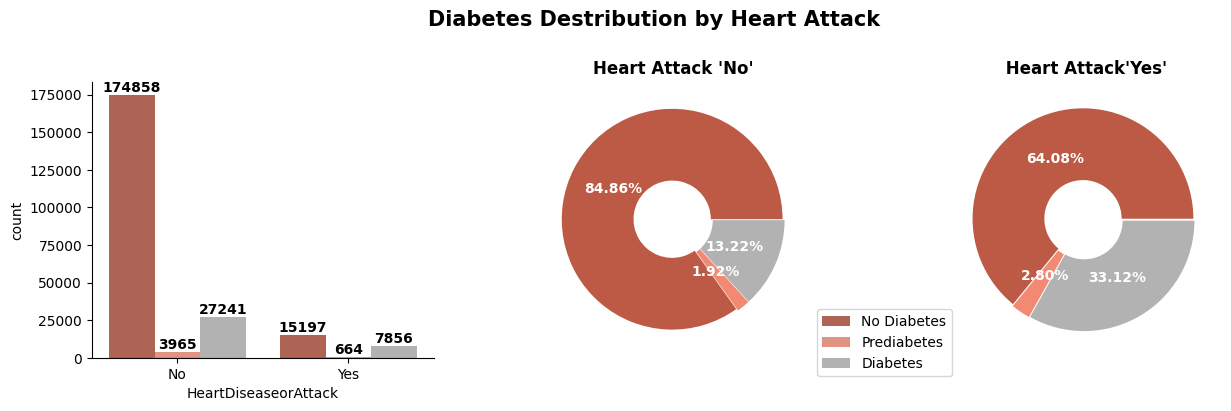

In [20]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Heart Attack", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="HeartDiseaseorAttack", hue="Diabetes_012", palette=["#bc5a45","#f18973","#b2b2b2"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["HeartDiseaseorAttack"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#bc5a45","#f18973","#b2b2b2"], textprops={"color":"white", "weight":"bold"})
plt.title("Heart Attack 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["HeartDiseaseorAttack"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#bc5a45","#f18973","#b2b2b2"], textprops={"color":"white", "weight":"bold"})
plt.title(" Heart Attack'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Diabetes is More Common in Heart Disease/Attack Patients
    * 33.12% of individuals with heart disease/attack have diabetes, compared to only 13.22% in those without heart disease.
    * This aligns with known medical research: diabetes significantly increases the risk of heart disease.
* Non-Diabetics Are More Common in the No Heart Disease Group
    * 84.86% of people without heart disease have no diabetes, whereas only 64.08% of those with heart disease are diabetes-free.
    * This suggests that maintaining healthy blood sugar levels may help lower heart disease risk.
* Slightly Higher Pre-Diabetes in Heart Disease/Attack Group
    * 2.80% of heart disease patients have pre-diabetes, compared to 1.92% in the non-heart disease group.
    * This suggests that pre-diabetes may also be a warning sign for future heart disease.
* Diabetes and heart disease are closely linked, with a much higher percentage of diabetics among those with heart disease.
* Preventing or managing diabetes may help reduce the risk of heart disease and heart attacks.
* Lifestyle changes like diet control, exercise, and monitoring blood sugar levels could be critical in lowering both risks.

# Person Engaged in Physical Activity  Vs Diabetes

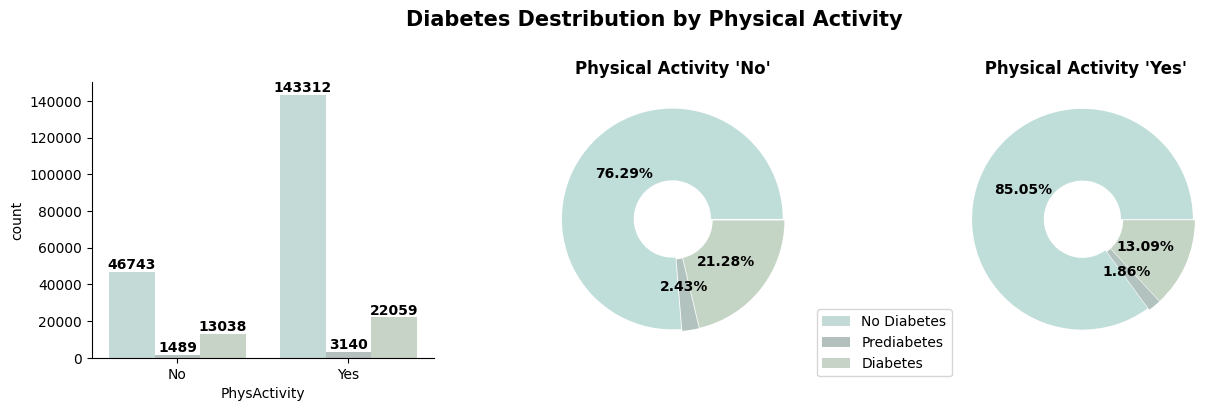

In [21]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Physical Activity", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="PhysActivity", hue="Diabetes_012", palette=["#c0ded9","#b2c2bf","#c5d5c5"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["PhysActivity"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c0ded9","#b2c2bf","#c5d5c5"], textprops={"color":"black", "weight":"bold"})
plt.title("Physical Activity 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["PhysActivity"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c0ded9","#b2c2bf","#c5d5c5"], textprops={"color":"black", "weight":"bold"})
plt.title(" Physical Activity 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Higher Diabetes Rates in People with No Physical Activity
    * 21.28% of people who do not engage in physical activity have diabetes, compared to only 13.09% of those who are physically active.
    * This confirms the well-known health benefit: regular physical activity reduces diabetes risk.
* More Non-Diabetics in the Active Group
    * 85.05% of physically active individuals do not have diabetes, compared to 76.29% in the inactive group.
    * This suggests that physical activity is a key factor in preventing diabetes.
* Higher Pre-Diabetes in the Inactive Group
    * 2.43% of those who are inactive have pre-diabetes, compared to 1.86% of active individuals.
    * This indicates that lack of physical activity may contribute to pre-diabetes as well.
* Being physically active is associated with lower diabetes rates and lower pre-diabetes prevalence.
* People who do not engage in physical activity have a much higher chance of developing diabetes.
* Encouraging regular exercise and movement can be an effective strategy to prevent or manage diabetes.

# Person Consumes Fruit Vs Diabetes

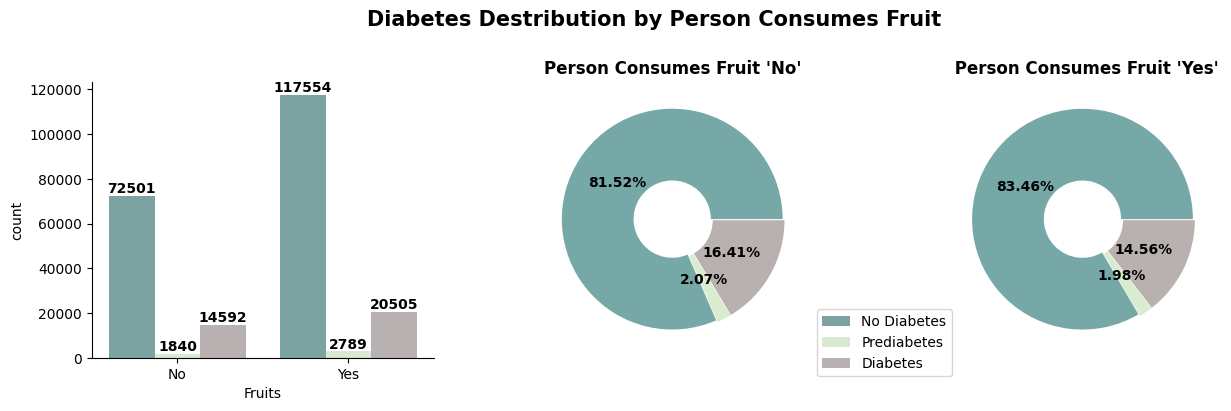

In [22]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Person Consumes Fruit", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="Fruits", hue="Diabetes_012", palette=["#77a8a8","#d9ecd0","#b9b0b0"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["Fruits"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#77a8a8","#d9ecd0","#b9b0b0"], textprops={"color":"black", "weight":"bold"})
plt.title("Person Consumes Fruit 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["Fruits"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#77a8a8","#d9ecd0","#b9b0b0"], textprops={"color":"black", "weight":"bold"})
plt.title(" Person Consumes Fruit 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Lower Diabetes Rate Among Fruit Eaters
    * 14.56% of people who eat fruits have diabetes, compared to 16.41% of those who do not eat fruits.
    * This suggests that fruit consumption might help reduce diabetes risk.
* Higher Non-Diabetic Percentage in Fruit Consumers
    * 83.46% of fruit eaters do not have diabetes, compared to 81.52% of those who do not eat fruits.
    * This highlights a potential health benefit of fruit consumption.
* Slightly Higher Pre-Diabetes in Non-Fruit Eaters
    * 2.07% of people who do not eat fruits have pre-diabetes, compared to 1.98% of fruit eaters.
    * While the difference is small, it supports the idea that a balanced diet may help regulate blood sugar levels.
* Eating fruits is associated with a slightly lower risk of diabetes.
* Those who do not eat fruits have a slightly higher percentage of diabetes cases.
* While fruit consumption alone is not a cure, it is part of a healthy lifestyle that may help prevent diabetes.

# Person Consumes Vegetables Vs Diabetes

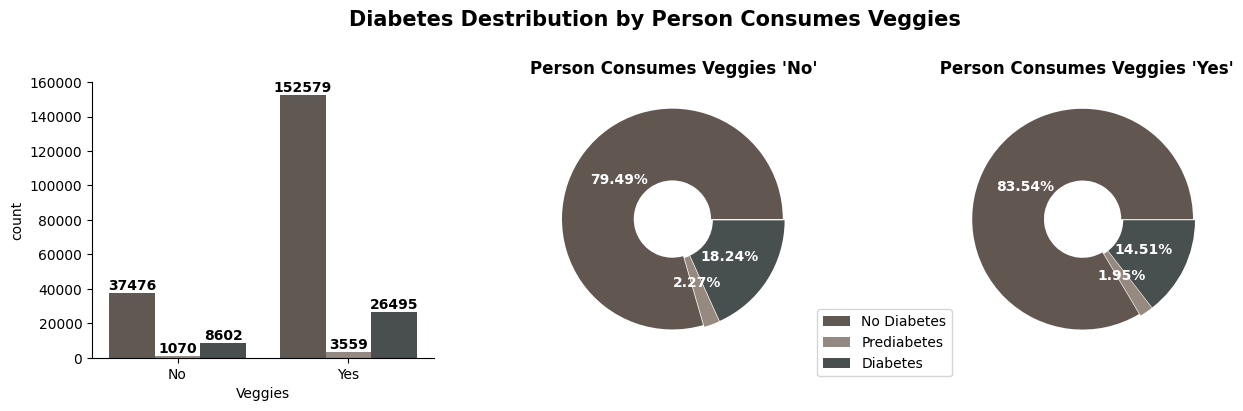

In [23]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Person Consumes Veggies", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="Veggies", hue="Diabetes_012", palette=["#625750","#96897f","#484f4f"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["Veggies"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#625750","#96897f","#484f4f"], textprops={"color":"white", "weight":"bold"})
plt.title("Person Consumes Veggies 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["Veggies"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#625750","#96897f","#484f4f"], textprops={"color":"white", "weight":"bold"})
plt.title(" Person Consumes Veggies 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Lower Diabetes Rate Among Vegetable Eaters
    * 14.51% of people who eat vegetables have diabetes, compared to 18.24% of those who do not.
    * This supports the idea that a diet rich in vegetables may help reduce diabetes risk.
* Higher Non-Diabetic Percentage in Vegetable Consumers
    * 83.54% of vegetable eaters do not have diabetes, compared to 79.49% of those who do not eat vegetables.
    * This indicates that vegetable consumption is linked to better overall health.
* Slightly Higher Pre-Diabetes in Non-Vegetable Eaters
    * 2.27% of non-vegetable eaters have pre-diabetes, compared to 1.94% of vegetable eaters.
    * This suggests that a balanced diet may help in preventing pre-diabetes as well.
* Eating vegetables is associated with a lower risk of diabetes.
* Those who do not eat vegetables have a higher percentage of diabetes cases.
* A diet rich in vegetables and other healthy foods may be key to diabetes prevention.

# Heavy Alcohol Consumption Vs Diabetes

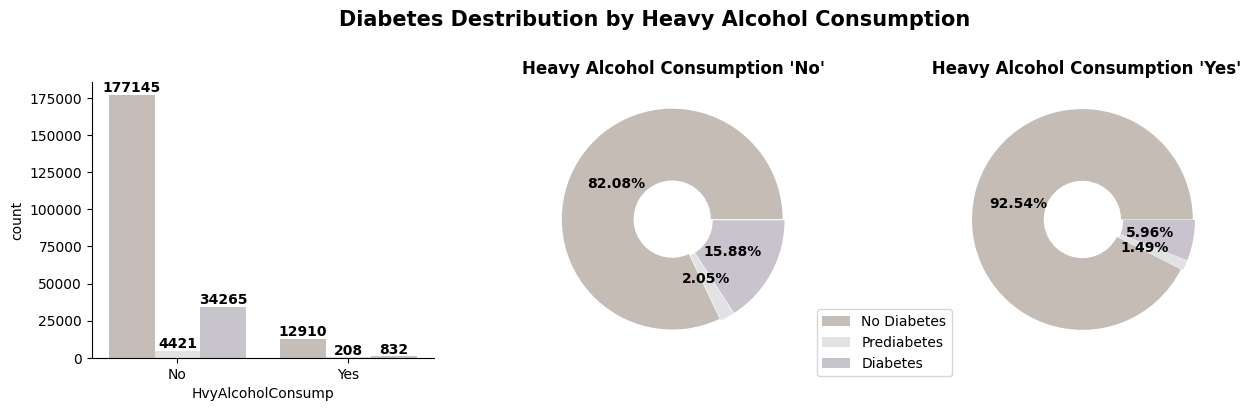

In [24]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Heavy Alcohol Consumption", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="HvyAlcoholConsump", hue="Diabetes_012", palette=["#c6bcb6","#e0e2e4","#c8c3cc"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["HvyAlcoholConsump"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c6bcb6","#e0e2e4","#c8c3cc"], textprops={"color":"black", "weight":"bold"})
plt.title("Heavy Alcohol Consumption 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["HvyAlcoholConsump"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c6bcb6","#e0e2e4","#c8c3cc"], textprops={"color":"black", "weight":"bold"})
plt.title(" Heavy Alcohol Consumption 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Lower Diabetes Rate Among Heavy Alcohol Consumers
    * 5.96% of people who consume heavy alcohol have diabetes, compared to 15.88% of those who do not consume heavy alcohol.
    * This indicates a lower diabetes prevalence among heavy alcohol consumers but could be coincidental, as alcohol consumption has its own risks.
* Higher Non-Diabetic Percentage in Heavy Alcohol Consumers
    * 92.54% of heavy alcohol consumers do not have diabetes, compared to 82.08% of those who do not consume heavy alcohol.
    * While this suggests a lower diabetes prevalence in alcohol consumers, heavy alcohol consumption is also linked to other health risks.
* Pre-Diabetes is Significantly Lower in Alcohol Consumers
    * Only 1.49% of heavy alcohol consumers have pre-diabetes, compared to 2.05% of non-consumers.
    * This suggests that heavy alcohol consumption may be somewhat protective against the development of pre-diabetes, though it is not a healthy solution.
* There is a lower percentage of diabetes among heavy alcohol consumers, but this is likely due to other factors.
* Heavy alcohol consumption has its own health risks, and it should not be seen as a solution to diabetes prevention.
* A balanced, healthy lifestyle with moderation in alcohol consumption is likely more beneficial.

# Person Have Healthcare Coverage Vs Diabetes

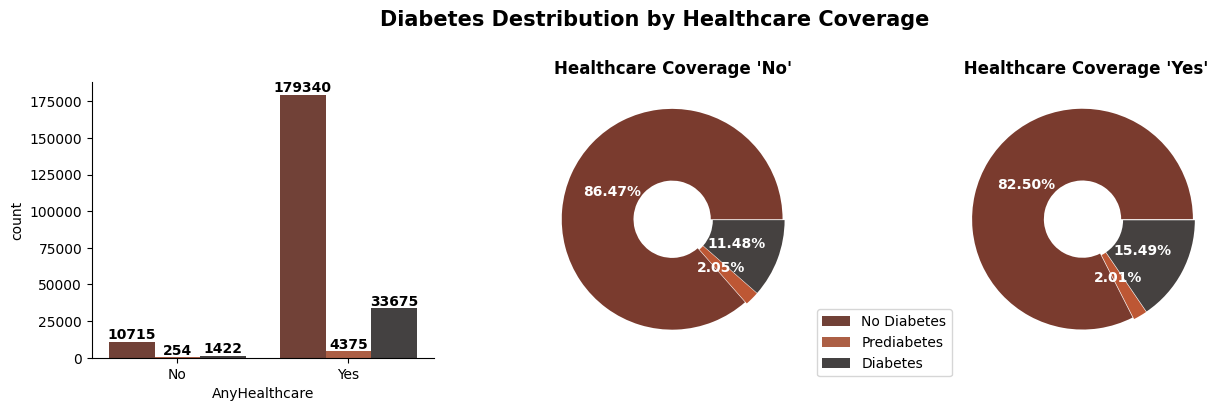

In [25]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Healthcare Coverage", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="AnyHealthcare", hue="Diabetes_012", palette=["#7a3b2e","#bd5734","#454140"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["AnyHealthcare"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#7a3b2e","#bd5734","#454140"], textprops={"color":"white", "weight":"bold"})
plt.title("Healthcare Coverage 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["AnyHealthcare"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#7a3b2e","#bd5734","#454140"], textprops={"color":"white", "weight":"bold"})
plt.title(" Healthcare Coverage 'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Higher Diabetes Rate in People with Healthcare Access
    * 15.49% of people with healthcare access have diabetes, compared to 11.48% of those without healthcare access.
    * This might seem counterintuitive, but it could be because people with healthcare access are more likely to be diagnosed and receive care for their conditions.
* Higher Non-Diabetic Percentage in People Without Healthcare Access
    * 86.47% of people without healthcare access do not have diabetes, compared to 82.50% of those with healthcare access.
    * This suggests that healthcare access can help in early detection and management of diabetes, but it doesn't necessarily prevent the condition.
* Pre-Diabetes is Slightly Higher in Those with Healthcare Access
    * 2.05% of people without healthcare access have pre-diabetes, compared to 2.01% with healthcare access.
    * This could reflect better screening and monitoring of pre-diabetes among those with healthcare access.
* Having healthcare access is associated with higher rates of diagnosed diabetes, likely due to better detection and management.
* People without healthcare access have a higher percentage of non-diabetic individuals, which could be due to the lack of routine screenings.
* Healthcare access is crucial for managing diabetes and preventing complications through early detection and regular monitoring.

# Not See a Doctor due to Cost Concerns Vs Diabetes

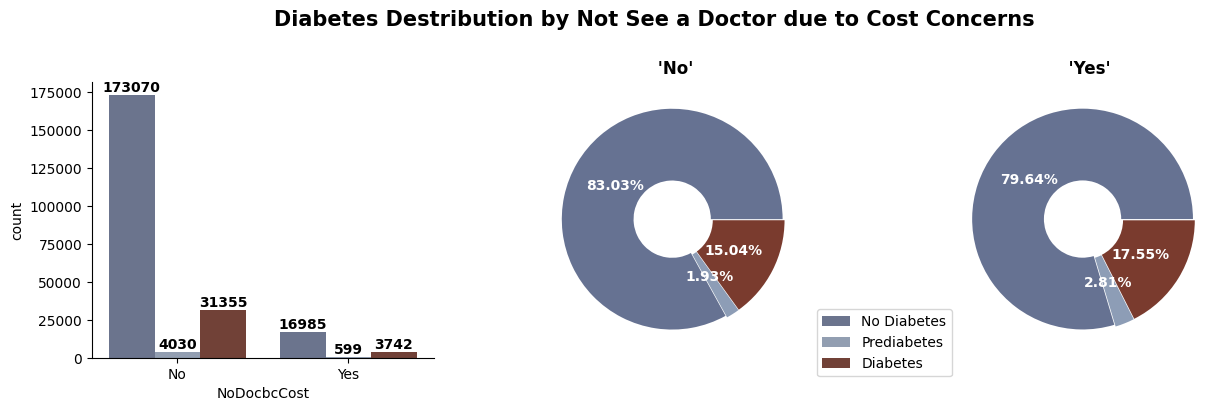

In [26]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Not See a Doctor due to Cost Concerns", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="NoDocbcCost", hue="Diabetes_012", palette=["#667292","#8d9db6","#7a3b2e"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["NoDocbcCost"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#667292","#8d9db6","#7a3b2e"], textprops={"color":"white", "weight":"bold"})
plt.title(" 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["NoDocbcCost"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#667292","#8d9db6","#7a3b2e"], textprops={"color":"white", "weight":"bold"})
plt.title("  'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Higher Diabetes Rate in People with Doctor's Visit Cost
    * 17.55% of people with doctor's visit costs have diabetes, compared to 15.04% of those without doctor’s visit costs.
    * This could indicate that healthcare access is still a key factor in diabetes prevention and management, despite associated costs.
* Higher Non-Diabetic Percentage in People Without Doctor's Visit Cost
    * 83.03% of those without doctor’s visit costs do not have diabetes, compared to 79.64% of those with doctor’s visit costs.
    * This suggests that people with more affordable healthcare may have better prevention and management of diabetes.
* Pre-Diabetes is Slightly Higher in Those with Doctor's Visit Cost
    * 2.81% of people with doctor's visit costs have pre-diabetes, compared to 1.93% of those without doctor’s visit costs.
    * The slight difference suggests that cost barriers may contribute to a lack of preventive care for pre-diabetes.
* The presence of doctor's visit costs is linked to a slightly higher percentage of diagnosed diabetes, likely due to barriers in access to regular healthcare and preventive services.
* Those without doctor’s visit costs tend to have slightly higher non-diabetic percentages, indicating the potential positive impact of affordable healthcare.
* Reducing healthcare costs can help improve diabetes prevention and management.

# General Health Rating Vs Diabetes

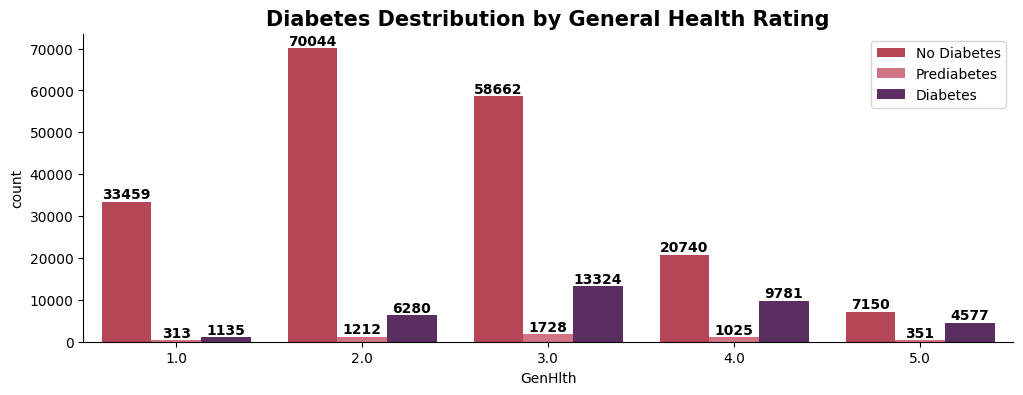

In [27]:
plt.figure(figsize=(12,4))
plt.title("Diabetes Destribution by General Health Rating", fontsize=15, fontweight="bold")
ax = sns.countplot(df, x="GenHlth", hue="Diabetes_012", palette=["#c83349","#e06377","#622569"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.show()

<Figure size 1500x800 with 0 Axes>

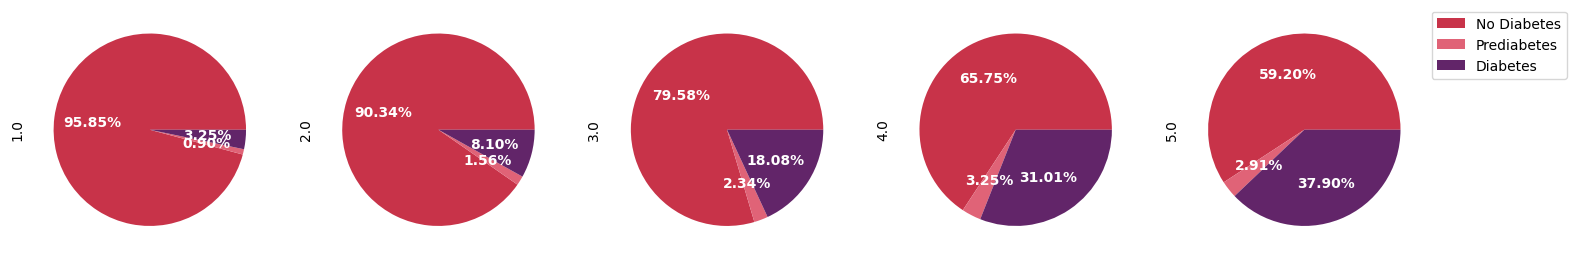

In [28]:
plt.figure(figsize=(15,8))
pd.crosstab(df["GenHlth"],df["Diabetes_012"]).T.plot.pie(subplots=True, legend=False, figsize=(18,8), autopct="%.2f%%",
                                                          colors=["#c83349","#e06377","#622569"], textprops={"color":"white", "weight":"bold"})
plt.legend(bbox_to_anchor=(1,1.02),labels=["No Diabetes","Prediabetes","Diabetes"])
plt.show()

> Findings
* Health Status Strongly Impacts Diabetes Risk
    * Excellent health status (1.0) has the lowest rate of diabetes at 3.25%.
    * Poor health status (5.0) has the highest rate of diabetes at 37.90%, showing a significant correlation between poor health and higher diabetes rates.
* Pre-Diabetes is More Common in Poorer Health States
    * Poor health (5.0) shows the highest percentage of diabetes at 37.90%, and a higher rate of pre-diabetes at 2.91% compared to people in excellent health.
    * Good and fair health states also show considerable pre-diabetes and diabetes rates, highlighting the importance of managing health early.
* Impact of Poor Health on Diabetes
    * As health status worsens, the percentage of people with diabetes increases:
    * Fair health status (4.0): 31.01% diabetes.
    * Good health status (3.0): 8.10% diabetes.
* Better overall health is strongly associated with a lower rate of diabetes, and poor health can significantly increase the risk of both pre-diabetes and diabetes.
* Maintaining a healthy lifestyle can prevent the progression to diabetes, particularly for individuals with fair to poor health statuses.

# Mental Health Vs Diabetes

<Figure size 1800x400 with 0 Axes>

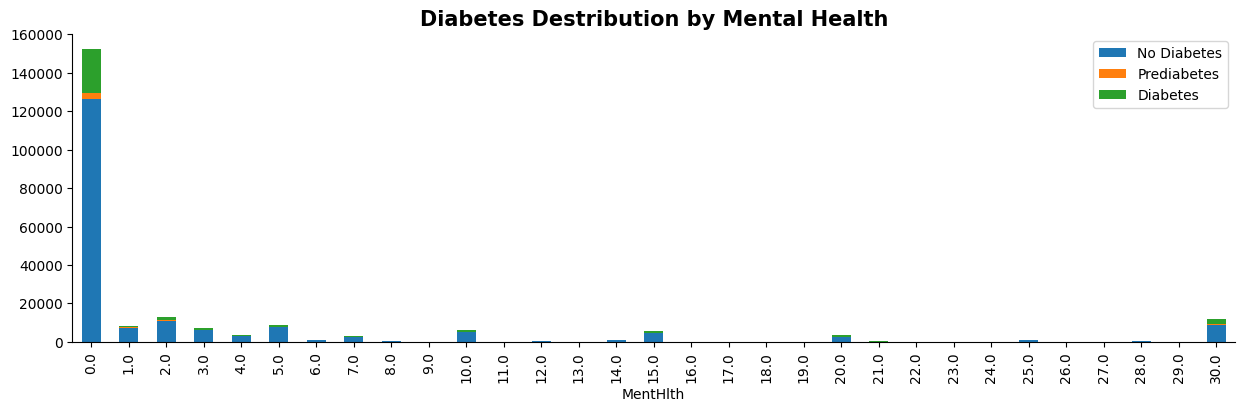

In [29]:
plt.figure(figsize=(18,4))
pd.crosstab(df["MentHlth"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by Mental Health", fontsize=15, fontweight="bold")
plt.show()

> Findings
* Increasing Mental Health Issues Correlate with Higher Diabetes Rates:
    * As the number of days with poor mental health increases, so does the rate of diabetes.
    * No poor mental health (0.0 days): 16.36% have diabetes.
    * 30 days of poor mental health (30.0): 30.93% have diabetes.
* Mental Health Severity and Pre-Diabetes:
    * Pre-diabetes rates increase as mental health declines.
    * People with 30 days of poor mental health have a 4.03% pre-diabetes rate, while those with no poor mental health have a 2.29% pre-diabetes rate.
* Diabetes Risk Among Individuals with High Mental Health Struggles:
    * For individuals with 30 days of poor mental health, the diabetes rate (30.93%) is significantly higher than for those with less or no mental health challenges.
* Mental health plays a crucial role in diabetes risk, with poor mental health correlating strongly with higher rates of both pre-diabetes and diabetes.
* Supporting mental health is essential for diabetes prevention and management.

# Physical Health Vs Diabetes

<Figure size 1800x400 with 0 Axes>

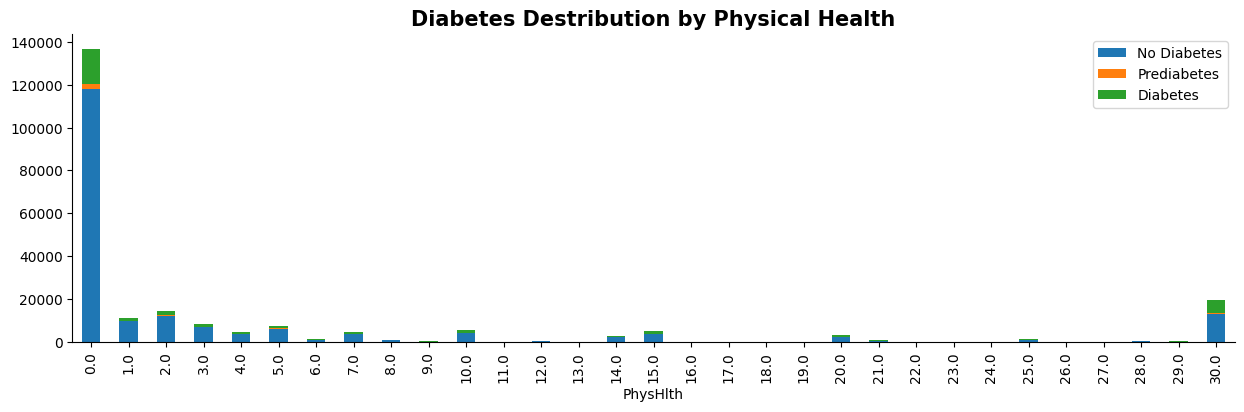

In [30]:
plt.figure(figsize=(18,4))
pd.crosstab(df["PhysHlth"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by Physical Health", fontsize=15, fontweight="bold")
plt.show()

> Findings
* Majority Have No Physical Health Issues
    * The highest count (117,911 people) reported zero days of poor physical health.
    * Among them, 82.4% have no diabetes, 1.7% have prediabetes, and 15.9% have diabetes.
* Increase in Diabetes Cases with Poor Physical Health
    * As the number of poor physical health days increases, the proportion of diabetes cases rises significantly.
    * Example: At 30 days of poor health, 26.3% have diabetes, compared to just 15.9% in those with no poor health days.
* Physical Health and Prediabetes Have a Weak Correlation
    * The proportion of prediabetes (1.7% - 2.0%) remains relatively stable across different levels of poor physical health.
* Sharp Increase in Diabetes at 30 Days of Poor Health
    * The highest number of diabetes cases is observed at 30 days of poor health (5,724 cases).
    * This suggests that chronic physical health issues are strongly associated with diabetes.

# Difficulty Walking Vs Diabetes

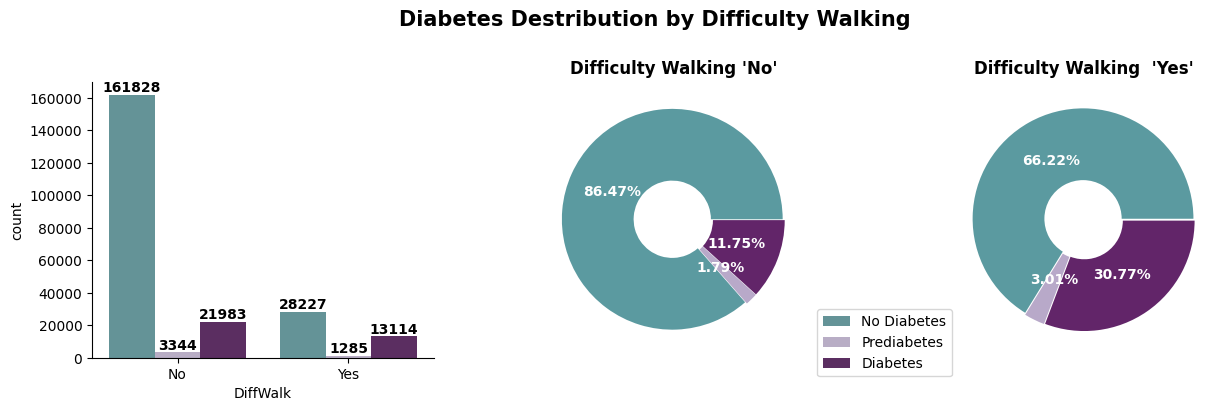

In [31]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Difficulty Walking", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="DiffWalk", hue="Diabetes_012", palette=["#5b9aa0","#b8a9c9","#622569"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["No","Yes"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["DiffWalk"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#5b9aa0","#b8a9c9","#622569"], textprops={"color":"white", "weight":"bold"})
plt.title("Difficulty Walking 'No'", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["DiffWalk"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#5b9aa0","#b8a9c9","#622569"], textprops={"color":"white", "weight":"bold"})
plt.title("Difficulty Walking  'Yes'", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Diabetes is More Common in People with Walking Difficulty
    * Among those who do not have difficulty walking (161,828 people), 11.75% have diabetes.
    * Among those who do have difficulty walking (28,227 people), 30.77% have diabetes.
    * This suggests a strong association between mobility issues and diabetes.
* Prediabetes Shows a Slight Increase in Those with Walking Difficulty
    * The percentage of prediabetes cases increases slightly from 1.79% (no difficulty) to 3.01% (difficulty walking).
* Strong Correlation Between Mobility Issues and Severe Diabetes Cases
    * In the no difficulty walking group, diabetes cases (2.0) account for 11.75%.
    * In the difficulty walking group, diabetes cases (2.0) increase to 30.77%.
    * This suggests that diabetes could be contributing to mobility issues or vice versa.

# Gender Vs Diabetes

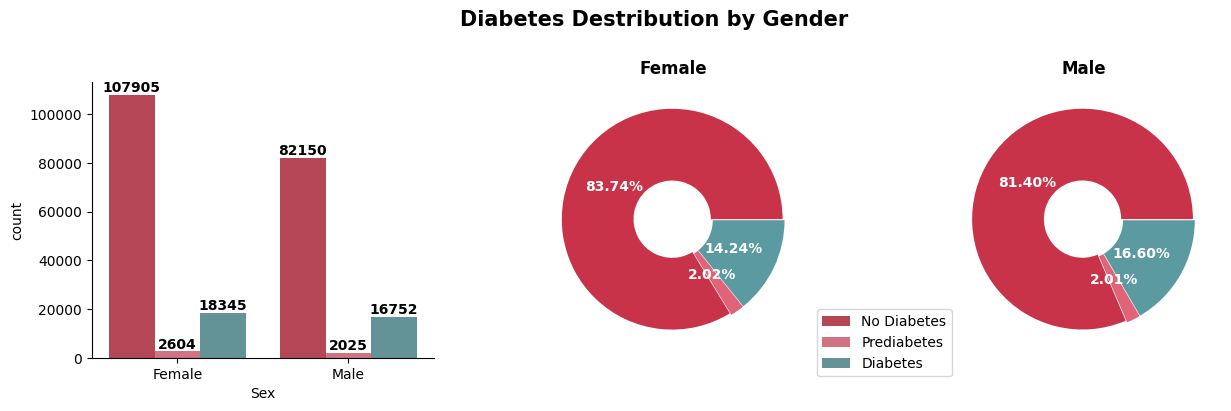

In [32]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(top=0.8)
plt.suptitle("Diabetes Destribution by Gender", fontsize=15, fontweight="bold")
plt.subplot(1,3,1)
ax = sns.countplot(df, x="Sex", hue="Diabetes_012", palette=["#c83349","#e06377","#5b9aa0"], legend=False)
for bars in ax.containers:
    ax.bar_label(bars, fontweight="bold")
plt.legend(bbox_to_anchor=(2.1,0.2),loc="upper left", labels=["No Diabetes","Prediabetes","Diabetes"] )
plt.xticks([0,1],["Female","Male"])
sns.despine(top=True, right=True)
plt.subplot(1,3,2)
plt.pie(confusion_matrix(df["Sex"],df["Diabetes_012"])[0], autopct="%.2f%%",wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c83349","#e06377","#5b9aa0"], textprops={"color":"white", "weight":"bold"})
plt.title("Female", fontsize=12, fontweight="bold")
plt.subplot(1,3,3)
plt.pie(confusion_matrix(df["Sex"],df["Diabetes_012"])[1], autopct="%.2f%%", wedgeprops={"width":0.65}, explode=(0.01,0.01,0.01),
       colors=["#c83349","#e06377","#5b9aa0"], textprops={"color":"white", "weight":"bold"})
plt.title("Male", fontsize=12, fontweight="bold")
plt.show()

> Findings
* Diabetes is Slightly More Common in Males (1.0) than Females (0.0)
    * Among females : 14.24% have diabetes (18,345 out of 134,854).
    * Among males : 16.0% have diabetes (16,752 out of 100,927).
    * This suggests that males might be at a slightly higher risk of diabetes than females.
* Prediabetes is Almost Even Across Genders
    * Females (2.02%) and males (2.01%) have nearly the same proportion of prediabetes.
* Higher Proportion of No Diabetes in Females
    * Females: 83.74% have no diabetes.
    * Males: 81.40% have no diabetes.
    * The slight difference suggests other factors (lifestyle, genetics, healthcare access) might play a role.

# Age Vs Diabetes

<Figure size 1800x400 with 0 Axes>

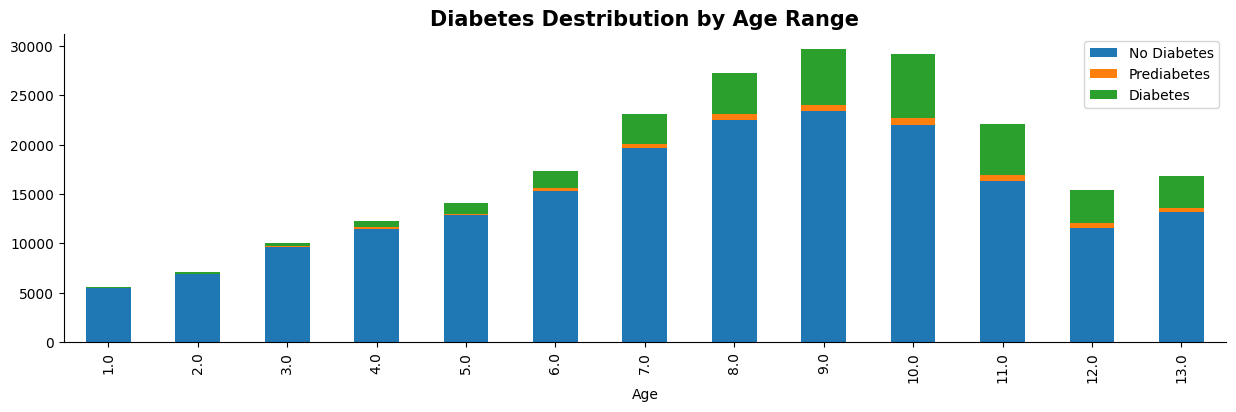

In [33]:
plt.figure(figsize=(18,4))
pd.crosstab(df["Age"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by Age Range", fontsize=15, fontweight="bold")
plt.show()

> Findings
* Diabetes cases increase with age:
    * Ages 1-3: Diabetes cases are below 3%.
    * Ages 4-6: Diabetes starts increasing gradually (5.1% → 10.1%).
    * Ages 7-10: Sharp increase (13.3% → 22.2%).
    * Ages 11-13: Peaks at 23.1% (Age 11) before slightly decreasing.
* Possible reason for slight decrease after Age 11:
    * Older individuals with severe diabetes may have health complications leading to fewer reported cases.
    * Lifestyle changes or treatment adoption could stabilize some cases.
* Prediabetes Remains Consistently Low
    * Prediabetes ranges between 0.4% (Age 1) to 2.9% (Age 12).
    * The highest percentage is seen around Ages 10-12 (~2.7%–2.9%).
    * This could indicate that many people transition directly from no diabetes to full diabetes instead of passing through the prediabetic stage.
* Rapid Decline in ‘No Diabetes’ Group
    * Age 1: 98.2% of individuals have no diabetes.
    * Age 10: Only 75.4% remain diabetes-free.
    * Age 11-13: Stabilizes around 74%–78%.
    * This suggests a strong link between aging and diabetes risk.
* Risk Doubling Points
    * Ages 5 to 7: Diabetes cases almost double (from 7.5% to 13.3%).
    * Ages 8 to 10: Another significant increase (from 15.6% to 22.2%).
    * Key Takeaway: Ages 5-7 and 8-10 could be critical intervention points where lifestyle changes (diet, exercise, medical check-ups) might help reduce diabetes risk.

# Education Vs Diabetes

<Figure size 1800x400 with 0 Axes>

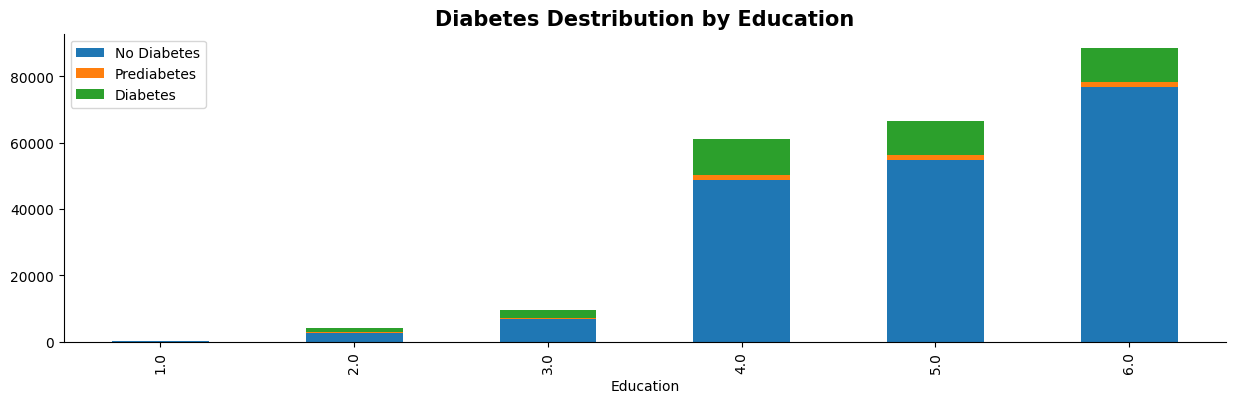

In [34]:
plt.figure(figsize=(18,4))
pd.crosstab(df["Education"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by Education", fontsize=15, fontweight="bold")
plt.show()

> Findings
* Higher Education = Lower Diabetes Prevalence
    * Diabetes is highest (27.0%) among the least educated (Education Level 1.0).
    * Diabetes is lowest (11.6%) among the most educated (Education Level 6.0).
    * There is a steady decline in diabetes cases as education level increases, suggesting that education may play a role in healthier lifestyles, better medical awareness, or access to healthcare.
* Prediabetes is Relatively Low Across All Groups
    * Prediabetes remains below 5% for all education levels.
    * The highest prediabetes rate is in Education Level 2.0 (4.0%), but it declines as education increases.
    * Similar to our previous findings, prediabetes is not a significant transition stage for most people.
* No Diabetes Group Increases with Education
    * Only 71.8% of the least educated individuals are diabetes-free.
    * Among the highest educated, 86.8% are diabetes-free.
    * This shows a strong positive correlation between education and better health outcomes.

# Income Vs Diabetes

<Figure size 1800x400 with 0 Axes>

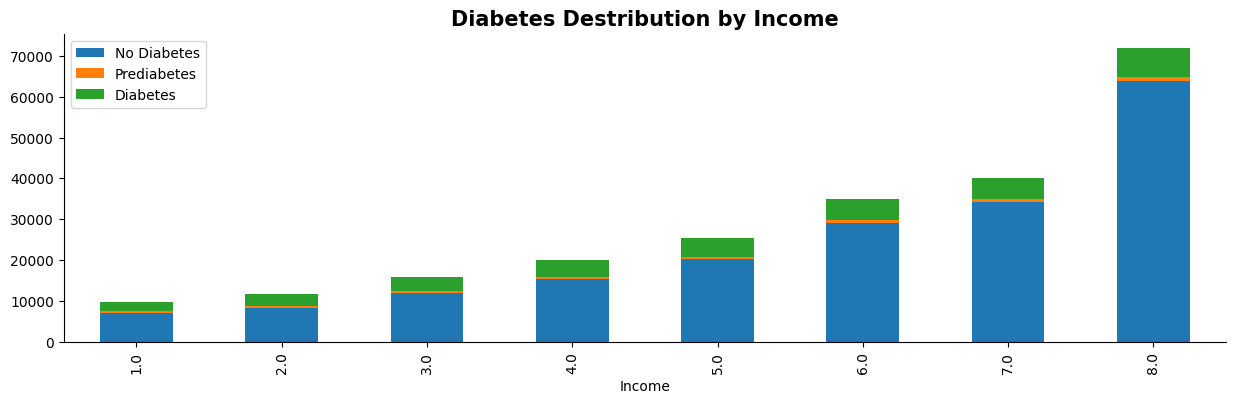

In [35]:
plt.figure(figsize=(18,4))
pd.crosstab(df["Income"],df["Diabetes_012"]).plot.bar(stacked=True,figsize=(15,4))
plt.legend(labels=["No Diabetes","Prediabetes","Diabetes"] )
sns.despine(top=True, right=True)
plt.title("Diabetes Destribution by Income", fontsize=15, fontweight="bold")
plt.show()

> Findings
* Higher Income = Lower Diabetes Prevalence
    * Diabetes is highest (26.3%) among the lowest income group (Income Level 2.0).
    * Diabetes is lowest (9.8%) among the highest income group (Income Level 8.0).
    * A clear trend: As income increases, diabetes rates drop consistently.
* Prediabetes Remains Low Across All Income Groups
    * Highest prediabetes rate (3.2%) in the lowest income group.
    * Lowest prediabetes rate (1.4%) in the highest income group.
    * Similar to the education analysis, most people transition directly from no diabetes to full diabetes instead of passing through prediabetes.
*  No Diabetes Group Increases with Income
    * Only 70.7% of people in the lowest income group are diabetes-free.
    * Among the highest income earners, 88.8% are diabetes-free.
    * This suggests that higher income is linked to healthier lifestyles or better healthcare access.

# Correlation 

In [36]:
data = df.copy()

In [37]:
scalar = StandardScaler()

In [38]:
data[["BMI",'GenHlth',
       'MentHlth', 'PhysHlth','Age', 'Education', 'Income']] = scalar.fit_transform(data[["BMI",'GenHlth',
       'MentHlth', 'PhysHlth','Age', 'Education', 'Income']])

In [39]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Range'],
      dtype='object')

In [40]:
data = data[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Range','Diabetes_012']]

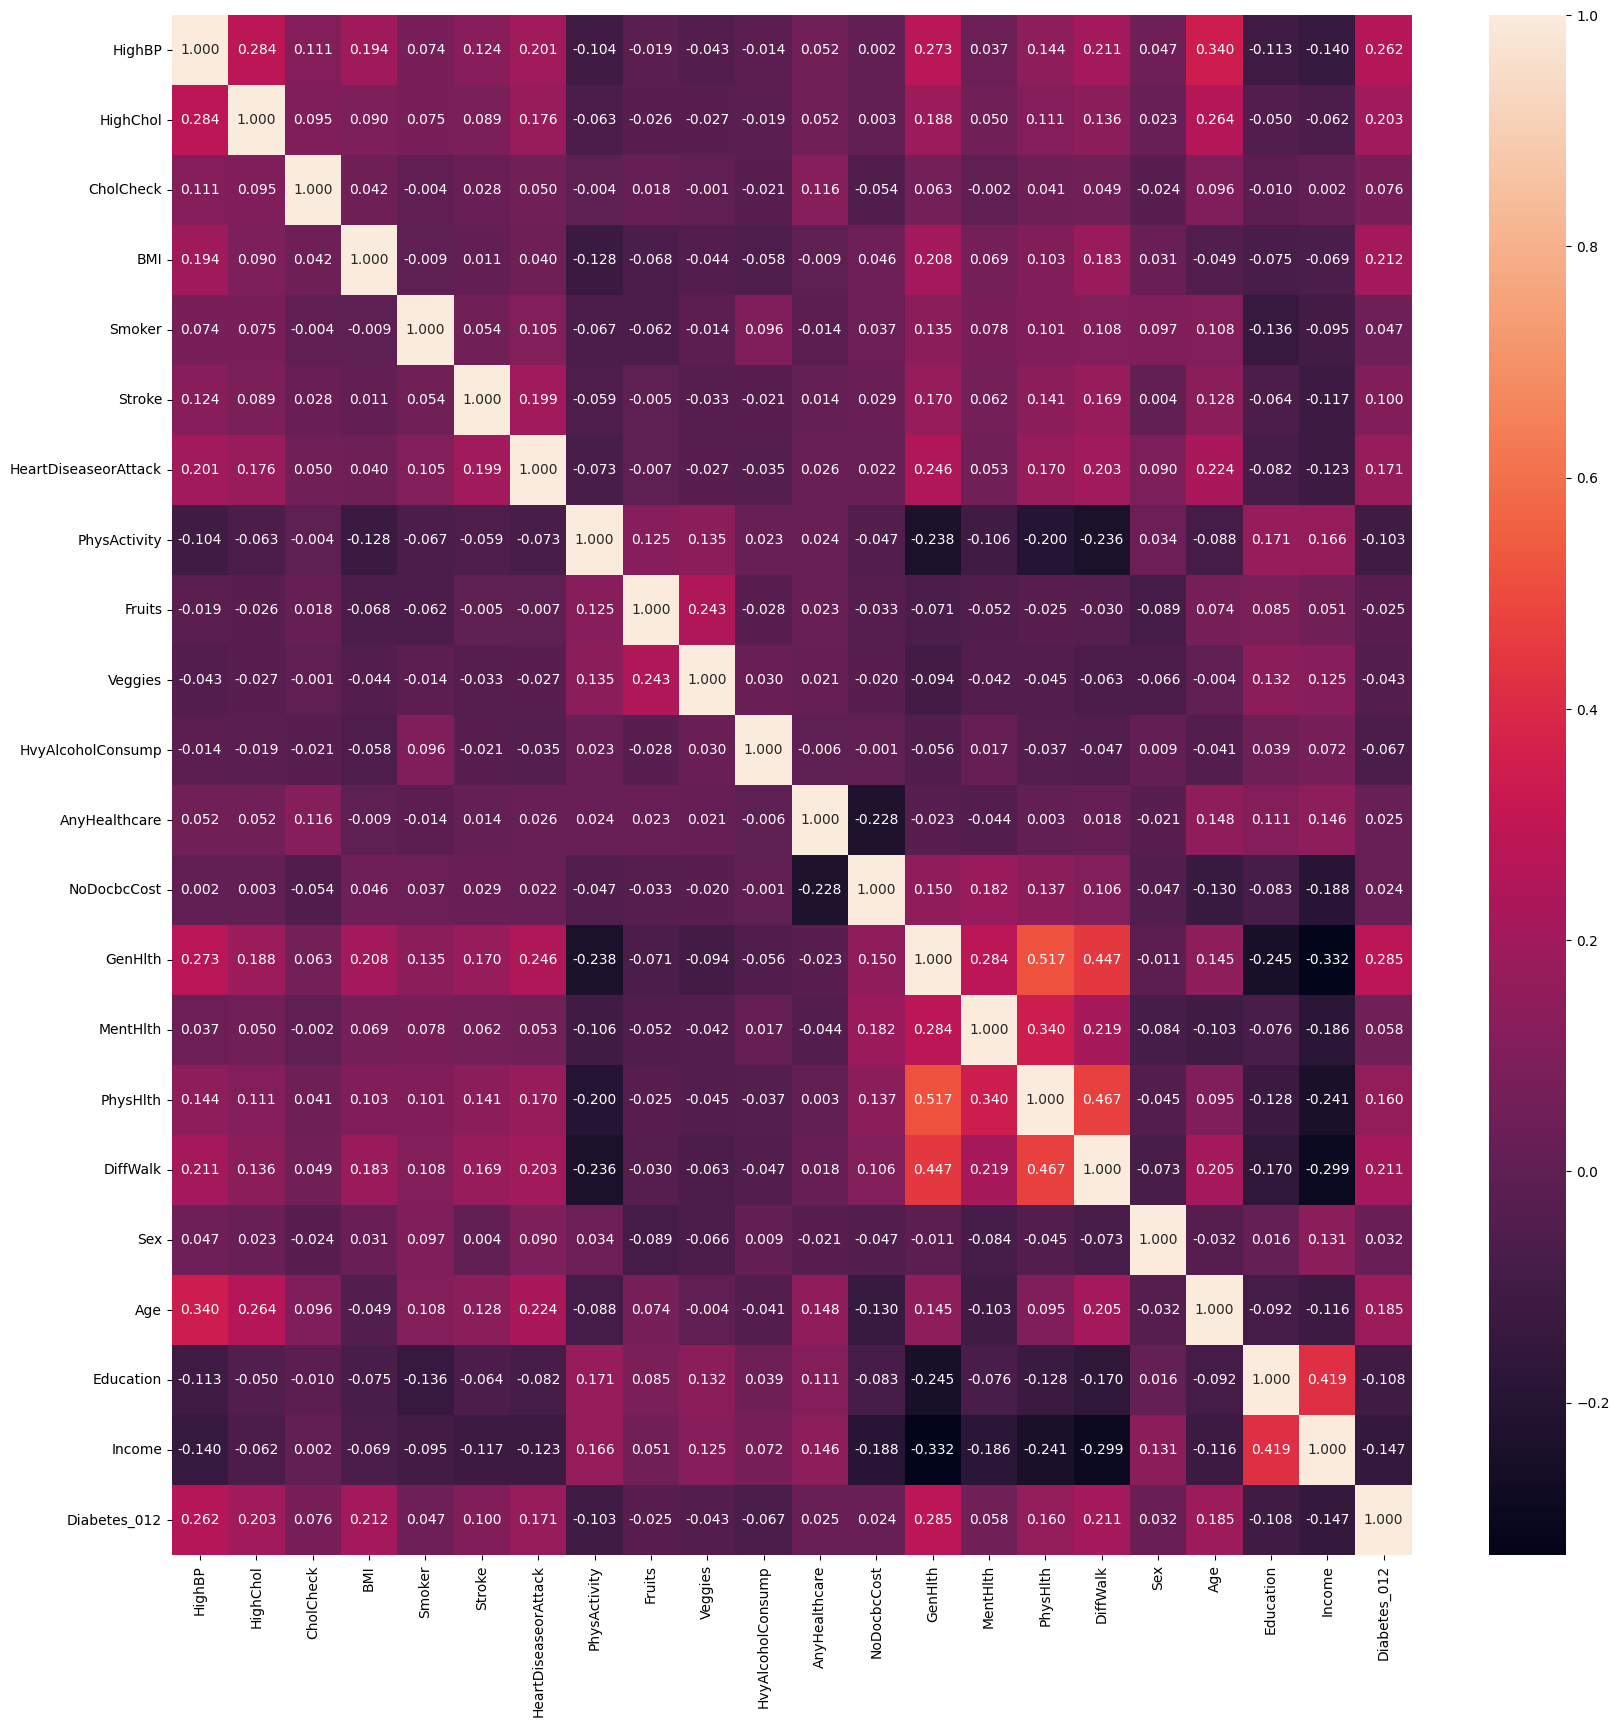

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.drop("BMI_Range", axis=1).corr(), annot=True, fmt=".3f")
plt.show()

> Findings
1. Positive Correlation
    * General Health (0.2849) : Poor overall health is strongly linked to diabetes.
    * High Blood Pressure (0.2620) : People with high blood pressure are at a higher risk of diabetes.
    * Body Mass Index (0.2120) : Higher BMI (obesity/overweight) is significantly linked to diabetes.
    * Difficulty Walking (0.2106) : Mobility issues might be a result of diabetes complications.
    * High Cholesterol (0.2033) : High cholesterol is a major diabetes risk factor.
    * Age (0.1846) : Older individuals have a higher likelihood of diabetes.
    * Heart Disease or Attack (0.1708) : Heart conditions are closely linked to diabetes.
    * Physical Health Issues (0.1605) : Poor physical health is associated with diabetes.
    * Stroke (0.1003) : Stroke survivors may have a higher risk of diabetes.
2. Negative Correlation
    * Income	(-0.1471) : Higher income → Lower diabetes risk. Likely due to better healthcare, nutrition, and lifestyle.
    * Education	(-0.1077) : More education → Lower diabetes risk. Educated individuals might make healthier choices.
    * Physical Activity (-0.1034) : More physical activity → Lower diabetes risk. Exercise is protective against diabetes.
    * Heavy Alcohol Consumption (-0.0672) : Surprisingly, heavy drinkers show lower diabetes risk. Could be due to confounding factors (e.g., lifestyle differences).
    * Eating Vegetables(-0.0434) : More vegetables → Lower diabetes risk. Nutrition plays a role.
    * Eating Fruits	(-0.0255) : More fruit consumption → Lower diabetes risk. Healthier diets may contribute to lower risk.
3. Weak or Insignificant Correlations
    * Mental Health(0.0577) : Mental health has a slight positive correlation but is not a major factor.
    * Sex(0.0322) : Gender doesn’t have a strong influence on diabetes risk.
    * Any Healthcare Access	(0.0249) : Healthcare access does not strongly predict diabetes presence.
    * Not Seeing a Doctor Due to Cost(0.0236) : Financial barriers to healthcare don’t strongly affect diabetes prevalence.

# Checking if Data is Imbalanced

In [42]:
df["Diabetes_012"].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

* Data is highly imbalanced because the majority class (0.0 = No Diabetes) significantly outweighs the other two classes (1.0 = Prediabetes and 2.0 = Diabetes).

In [43]:
data_0 = df[df["Diabetes_012"]==0.0]
data_1 = df[df["Diabetes_012"]==1.0]
data_2 = df[df["Diabetes_012"]==2.0]

In [44]:
data_0.shape,data_1.shape,data_2.shape,

((190055, 23), (4629, 23), (35097, 23))

In [45]:
over1 = resample(data_1, n_samples=len(data_0))
over2 = resample(data_2, n_samples=len(data_0))

In [46]:
data_0.shape, over1.shape, over2.shape

((190055, 23), (190055, 23), (190055, 23))

In [47]:
resampled_df = pd.concat([data_0, over1, over2]).reset_index(drop=True)

In [48]:
resampled_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Range
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Severely Obese (Very High Risk)
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,Overweight (Moderate Risk)
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,Overweight (Moderate Risk)
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,Overweight (Moderate Risk)
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,Normal (Lowest Risk)


# Train Test Splitting Data

In [49]:
X = resampled_df.drop(["Diabetes_012","BMI_Range"], axis=1)
y = resampled_df["Diabetes_012"]

In [50]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [51]:
lr_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler()),
    ("classifier", LogisticRegression())
])
lr_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', LogisticRegression())])

In [52]:
print("Training Score :", lr_pipeline.score(X_tr, y_tr))
y_pred = lr_pipeline.predict(X_te)
print("Testing Score :", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

Training Score : 0.5119658344514307
Testing Score : 0.5122026080169776
              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61     37858
         1.0       0.43      0.30      0.36     38217
         2.0       0.50      0.59      0.54     37958

    accuracy                           0.51    114033
   macro avg       0.50      0.51      0.50    114033
weighted avg       0.50      0.51      0.50    114033



# Decision Tree

In [53]:
dt_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler()),
    ("classifier", DecisionTreeClassifier())
])
dt_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [54]:
print("Training Score :", dt_pipeline.score(X_tr, y_tr))
y_pred = dt_pipeline.predict(X_te)
print("Testing Score :", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

Training Score : 0.9961590066033517
Testing Score : 0.9348083449527769
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.89     37858
         1.0       0.97      1.00      0.99     38217
         2.0       0.86      0.99      0.92     37958

    accuracy                           0.93    114033
   macro avg       0.94      0.93      0.93    114033
weighted avg       0.94      0.93      0.93    114033



# Random Forest

In [55]:
rf_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler()),
    ("classifier", RandomForestClassifier())
])
rf_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [56]:
print("Training Score :", rf_pipeline.score(X_tr, y_tr))
y_pred = rf_pipeline.predict(X_te)
print("Testing Score :", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

Training Score : 0.9961590066033517
Testing Score : 0.960476353336315
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     37858
         1.0       1.00      1.00      1.00     38217
         2.0       0.90      0.99      0.94     37958

    accuracy                           0.96    114033
   macro avg       0.96      0.96      0.96    114033
weighted avg       0.96      0.96      0.96    114033



# Gradient Boosting

In [57]:
gb_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler()),
    ("classifier", GradientBoostingClassifier())
])
gb_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

In [58]:
print("Training Score :", gb_pipeline.score(X_tr, y_tr))
y_pred = gb_pipeline.predict(X_te)
print("Testing Score :", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

Training Score : 0.5324226320451098
Testing Score : 0.5314338831741688
              precision    recall  f1-score   support

         0.0       0.60      0.61      0.61     37858
         1.0       0.46      0.37      0.41     38217
         2.0       0.52      0.62      0.56     37958

    accuracy                           0.53    114033
   macro avg       0.53      0.53      0.53    114033
weighted avg       0.53      0.53      0.53    114033



# Adaboost

In [59]:
ada_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler()),
    ("classifier", AdaBoostClassifier(estimator=DecisionTreeClassifier()))
])
ada_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier()))])

In [60]:
print("Training Score :", ada_pipeline.score(X_tr, y_tr))
y_pred = ada_pipeline.predict(X_te)
print("Testing Score :", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

Training Score : 0.9961590066033517
Testing Score : 0.9427095665289872
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     37858
         1.0       0.98      1.00      0.99     38217
         2.0       0.88      0.99      0.93     37958

    accuracy                           0.94    114033
   macro avg       0.95      0.94      0.94    114033
weighted avg       0.95      0.94      0.94    114033



# Compairing Results

1. Logistic Regression
    * Train Score: 0.512
    * Test Score: 0.512
    * This model is performing poorly, likely because the data is non-linear and logistic regression is too simple for this task.
2. Decision Tree Classifier
    * Train Score: 0.996
    * Test Score: 0.935
    * The model is highly overfitting. The training accuracy is nearly perfect, but the testing accuracy is much lower.
3. Random Forest Classifier
    * Train Score: 0.996
    * Test Score: 0.960
    * This model generalizes better than a single Decision Tree, showing strong performance.
4. Gradient Boosting Classifier
    * Train Score: 0.532
    * Test Score: 0.531
    * This model isn't performing well, likely due to improper hyperparameter tuning.
5. AdaBoost with Decision Tree
    * Train Score: 0.996
    * Test Score: 0.943
    * Better than a single Decision Tree, but still overfitting.

# Random Forest is the best performer

* Random Forest model is performing quite well with an overall accuracy of 96%.
* model generalizes well with balanced precision, recall, and F1-score across classes.

> Class-wise Performance:
1. Class 0 (label 0.0)
    * Precision: 0.99 (Few false positives)
    * Recall: 0.89 (Some false negatives)
    * F1-Score: 0.94
    * This means class 0 is predicted well, but it has some false negatives (cases where the actual label is 0 but predicted otherwise).
2. Class 1 (label 1.0)
    * Precision: 1.00 (Almost no false positives)
    * Recall: 1.00 (Almost no false negatives)
    * F1-Score: 1.00
    * Perfect classification for this class.
3. Class 2 (label 2.0)
    * Precision: 0.90 (Some false positives)
    * Recall: 0.99 (Very few false negatives)
    * F1-Score: 0.94
    * This class has high recall but lower precision, meaning it's catching most of the actual class 2 cases but also misclassifying some other classes as 2.

# Cross Vaidation Score

In [64]:
cvs = cross_val_score(estimator=rf_pipeline, X=X_tr, y=y_tr, verbose=True, n_jobs=-1, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 20.4min finished


In [65]:
print("Cross Validation Scores :", cvs)

Cross Validation Scores : [0.94890767 0.94867747 0.94812882 0.94884134 0.94914827]


In [66]:
print("Mean Cross Validation Score :", cvs.mean())

Mean Cross Validation Score : 0.9487407151795655


*  Cross-validation scores are consistently around 94.87%, which confirms that your Random Forest model generalizes well across different subsets of the data.

* Stable Performance: The scores are very close to each other, indicating that model isn’t highly dependent on a particular subset of data.
* No Major Overfitting: Training score (99.6%) is slightly higher than cross-validation mean (94.87%), which suggests some overfitting, but it's not severe.
* Reliable Model: Since CV scores are consistent, model is robust and not prone to high variance.

# Saving the model into pickle file format for further use or integreating into web app

In [67]:
jb.dump(rf_pipeline, "Diabetes Health Indicator.pk1")

['Diabetes Health Indicator.pk1']

In [68]:
model = jb.load("Diabetes Health Indicator.pk1")

In [69]:
model.predict(X_te)

array([1., 2., 2., ..., 1., 2., 1.])

**Copyright**

© Nikhil Nikhare.2025 All Rights Reserved 

**Diabetes Health Indicator**

This model and its assocoated documentation are the intellectual property of Nikhil Nikhare, Unauthorised reproduction, destribution or modification of this model in whole or in part is strictly prohibated without prior written consent from the copyright holder.